# Game Theory, HA3

## Task 3

### Iterated prisoner's dilemma


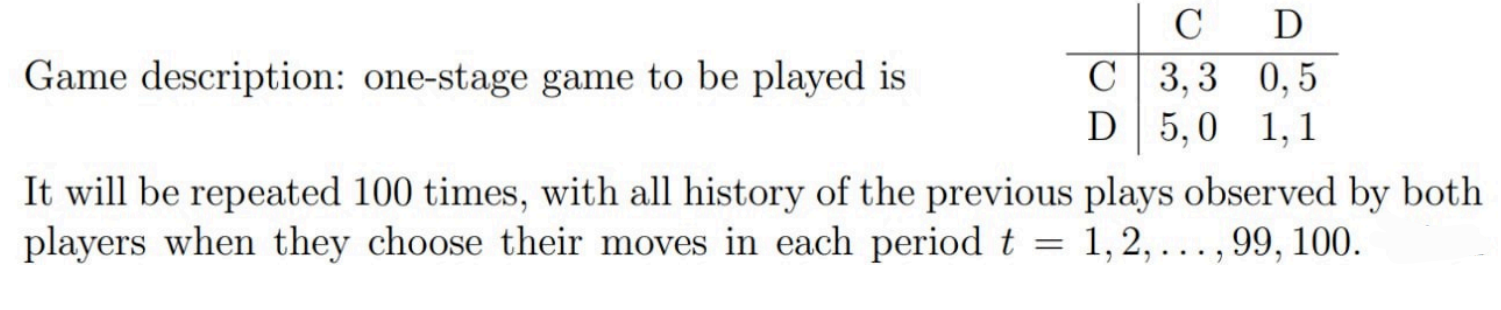

In [1]:
from IPython.display import Image
import numpy as np
from scipy.stats import chisquare
image_path = r'C:/Users/Popov/Documents/NES_studies/Python/Game_Theory/HA3/Pr_Dil_100.png'
Image(filename=image_path)

### Code
x -- vector of my actions

y -- vector of my opponent's actions

False - C action (cooperate)

True - D action (defect)

In [2]:
## Is needed for the main code!
def chi_square_test(boolean_sequence):
            observed_counts = [int(sum(boolean_sequence)), len(boolean_sequence) - int(sum(boolean_sequence))]
            expected_counts = [len(boolean_sequence) // 2, len(boolean_sequence) // 2]

            _, p_value = chisquare(observed_counts, f_exp=expected_counts)
            return p_value
target_p_value = 0.25
### Main code
def forgive_mercilessly(x, y, t):
    if t == 0:
        return False # trust at first
    elif 1<= t <= 2:
        return y[t-1] # tit-for-tat later
    
    elif (x[t-2] == True and x[t-1] == True): # catch Grim Trigger/ D all (stop cooperating)
          return True
    
    elif (y[t-3] == True and x[t-2] == True and y[t-2] == False and x[t-1] == False and y[t-1] == True): 
        return False # see if we are againts tit-or-tat, Pavlov (get back to cooperation)
    
    elif 3 <= t <= 9:
        return y[t-1] # tit-for-tat again
    
    elif t == 10: # check for randomness of the opponent's strategy
        from scipy.stats import chisquare
        
        randomness_p_value = chi_square_test(y[:10])
        if randomness_p_value <= target_p_value:
            return True # cooperate agaits random
        else: return y[t-1] # otherwise - back to tit-for-tat
    
    elif t == 11: # once again - to be sure
        randomness_p_value = chi_square_test(y[:10])
        if randomness_p_value <= target_p_value:
            return True # defect agaits random
        else: return y[t-1] # otherwise - back to tit-for-tat
    
    elif 12 <= t <= 98: # tit-for-tat again
        return y[t-1]
    elif t == 99:
        return y[t-1]
    

Notes on testing on randomness

In [3]:
np.random.seed(90)
non_random_vector = np.concatenate([np.ones(3), np.zeros(7)]).astype(int)

In [4]:
from scipy.stats import chisquare

def chi_square_test(boolean_sequence):
    observed_counts = [int(sum(boolean_sequence)), len(boolean_sequence) - int(sum(boolean_sequence))]
    expected_counts = [len(boolean_sequence) // 2, len(boolean_sequence) // 2]

    _, p_value = chisquare(observed_counts, f_exp=expected_counts)

    return p_value

# Example usage:
randomness_p_value_1 = chi_square_test(non_random_vector[:10])
print("Chi-Square Test P-Value:", randomness_p_value_1)

Chi-Square Test P-Value: 0.20590321073206466


In [5]:
non_random_vector_2 = np.concatenate([np.ones(4), np.zeros(6)]).astype(int)

randomness_p_value_2 = chi_square_test(non_random_vector_2[:10])
print("Chi-Square Test P-Value:", randomness_p_value_2)

Chi-Square Test P-Value: 0.5270892568655381


In [6]:
random_1 = np.random.choice([0, 1], size=10)

randomness_p_value_3 = chi_square_test(random_1[:10])
print("Chi-Square Test P-Value:", randomness_p_value_3)

Chi-Square Test P-Value: 0.5270892568655381


So, we need to set tagret p-value on 0.25

Test of our model on random vectors

In [7]:
import numpy as np

random_1 = np.random.choice([0, 1], size=100)
random_2 = np.random.choice([0, 1], size=100)

# Into True / False
b_random_1 = [value == 1 for value in random_1]
b_random_2 = [value == 1 for value in random_2]

In [8]:
total_sum = 0
# See respones of the model
for i in range(100):
    test_output = forgive_mercilessly(b_random_1, b_random_2, i)
    if 0 <= i <= 10:
        print(test_output)

False
False
False
True
True
False
True
True
True
True
True


Total number of C played :

In [9]:
total_sum = 0

for i in range(100):
    test_output = forgive_mercilessly(b_random_1, b_random_2, i)
    total_sum += int(test_output)  # Convert the boolean to int before adding

print("Total Sum:", total_sum)

Total Sum: 52


Model is alive!